<div style="background-color: #d1a8ed; color: black; border: 5px solid #9038b5; padding: 10px;">
  <h1>About</h1>
    This is an example usage of <a href="https://pypi.org/project/tokenkit/" target="_blank">TokenKit</a>
</div>

#
<div class="alert alert-block alert-warning"  
     style="background-color: #d1a8ed; color: black; border: 5px solid #9038b5; padding: 10px;">  
  <h1>Import</h1>
</div>

In [1]:
from transformers import AutoTokenizer
from datasets import load_dataset
import pandas as pd
from tqdm import tqdm

from tokenkit import *

/opt/anaconda3/envs/bill_gates/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#
<div class="alert alert-block alert-warning"  
     style="background-color: #d1a8ed; color: black; border: 5px solid #9038b5; padding: 10px;">  
  <h1>Try on Dataset</h1>
</div>

# Preprocess data
FLORES+ dataset: [HERE](https://huggingface.co/datasets/openlanguagedata/flores_plus)

In [2]:
flores_df = load_dataset("openlanguagedata/flores_plus", split='dev').to_pandas()
flores_df = flores_df.rename(columns={'iso_15924':'language'}).reset_index()
print(flores_df.shape)
flores_df.head(2)

(218343, 12)


,index,id,iso_639_3,language,glottocode,text,url,domain,topic,has_image,has_hyperlink,last_updated
0,0,0,ace,Arab,achi1257,يق أورو سنين، اوق علمون دري فکولتس کدوکترن يون...,https://en.wikinews.org/wiki/Scientists_say_ne...,wikinews,health,yes,yes,1.0
1,1,1,ace,Arab,achi1257,ڤنليتي اوتام خن اترا ڽو موڠکين محسى ديتيکسي فو...,https://en.wikinews.org/wiki/Scientists_say_ne...,wikinews,health,yes,yes,1.0


In [3]:
english = flores_df[flores_df['glottocode']=='stan1293'][['id', 'text']] # ['glottocode']=='stan1293' is English
print(english.shape)
english.head(2)

(997, 2)


,id,text
54835,0,"On Monday, scientists from the Stanford Univer..."
54836,1,Lead researchers say this may bring early dete...


In [4]:
lang2eng = flores_df.merge(english, how='inner', on='id')
lang2eng = lang2eng[['id', 'glottocode', 'text_x', 'topic', 'language', 'text_y']].sample(100).reset_index()
# lang2eng = lang2eng[(lang2eng['text_x'].str.startswith('Kamême, Charles a gue na') | lang2eng['text_x'].str.startswith('Lalaa wondu')) & (lang2eng['language'] == 'Latn')].reset_index()
lang2eng.rename(columns={'text_x':'text', 'text_y':'text2'}, inplace=True)
lang2eng.head(2)

,index,id,glottocode,text,topic,language,text2
0,55226,391,stan1293,"Sanskrit is a very complex and rich language, ...",Languages/Sanskrit,Latn,"Sanskrit is a very complex and rich language, ..."
1,35571,676,bulg1262,"Докато планирате, имайте предвид, че макар Южн...","travel, tourism",Cyrl,Keep in mind while planning that although Sout...


# Try `fertilize`

In [5]:
text = lang2eng['text'][1]

fertility_score, tokens = fertilize(text)
print('Fertility Score:', fertility_score)
print('Tokens:', tokens)

Fertility Score: 2.5625
Tokens: ['ÐĶ', 'Ð¾Ðº', 'Ð°ÑĤÐ¾', 'ĠÐ¿Ð»Ð°Ð½Ð¸', 'ÑĢÐ°ÑĤ', 'Ðµ', ',', 'ĠÐ¸Ð¼', 'Ð°Ð¹ÑĤÐµ', 'ĠÐ¿ÑĢÐµÐ´', 'Ð²Ð¸Ð´', ',', 'ĠÑĩ', 'Ðµ', 'ĠÐ¼Ð°Ðº', 'Ð°ÑĢ', 'ĠÐ®', 'Ð¶', 'Ð½Ð°', 'ĠÐĲÑĦ', 'ÑĢÐ¸', 'ÐºÐ°', 'ĠÐ´Ð°', 'ĠÐµ', 'ĠÑģÑĤ', 'Ð°Ð±', 'Ð¸Ð»', 'Ð½Ð°', ',', 'ĠÐ½Ðµ', 'ĠÐ²Ñģ', 'Ð¸Ñĩ', 'ÐºÐ¸', 'ĠÑģÑĬ', 'ÑģÐµÐ´', 'Ð½Ð¸', 'ĠÑģÑĤÑĢ', 'Ð°Ð½Ð¸', 'ĠÑģ', 'Ð°', '.']


In [6]:
text = lang2eng['text'][1]
tokenizer = AutoTokenizer.from_pretrained('microsoft/Phi-3.5-mini-instruct')

fertility_score, tokens = fertilize(text, tokenizer)
print('Fertility Score:', fertility_score)
print('Tokens:', tokens)

Fertility Score: 2.625
Tokens: ['▁До', 'ка', 'то', '▁пла', 'ни', 'ра', 'те', ',', '▁има', 'й', 'те', '▁пред', 'вид', ',', '▁че', '▁ма', 'кар', '▁Ю', 'ж', 'на', '▁А', 'фри', 'ка', '▁да', '▁е', '▁ста', 'би', 'л', 'на', ',', '▁не', '▁в', 'си', 'чки', '▁съ', 'се', 'д', 'ни', '▁стра', 'ни', '▁са', '.']


# Try `paritize`

In [7]:
text1 = lang2eng['text'][2]
text2 = lang2eng['text2'][2]
parity_score = paritize(text1, text2)
print('Parity Score:', parity_score)

Parity Score: 1.9333333333333333


# Try `TokenMetrics`

In [8]:
tokenmetrics = TokenMetrics(lang2eng)
scored = tokenmetrics.fertilize('text', 'language')
scored.head()

,language,corpus,fertility,tokens
0,Latn,"Sanskrit is a very complex and rich language, ...",2.435701,"[S, ansk, rit, Ġis, Ġa, Ġvery, Ġcomplex, Ġand,..."
1,Cyrl,"Докато планирате, имайте предвид, че макар Южн...",3.598726,"[ÐĶ, Ð¾Ðº, Ð°ÑĤÐ¾, ĠÐ¿Ð»Ð°Ð½Ð¸, ÑĢÐ°ÑĤ, Ðµ, ,,..."
2,Olck,ᱯᱨᱚᱠᱟᱥ ᱵᱟᱞᱵ ᱫᱚ ᱟᱨ ᱢᱤᱫ ᱡᱮᱠᱷᱟ ᱵᱚᱫᱚᱞ ᱫᱚᱨᱠᱟᱨ ᱠᱟᱱᱟ᱾...,13.875000,"[á, ±, ¯, á, ±, ¨, á, ±, ļ, á, ±, ł, á, ±, Ł, ..."
3,Guru,"ਸਮੁੰਦਰੀ ਤੱਟ, ਥੀਮ ਪਾਰਕ ਅਤੇ ਕੈਂਪ ਮੈਦਾਨ ਮਨੋਰੰਜਕ ਯ...",9.000000,"[à¨, ¸, à¨, ®, à©, ģ, à©, °, à¨, ¦, à¨, °, à©,..."
4,Arab,وحتى أكثر الصحاري حرارة ممكن ترجع باردة مرة با...,2.394737,"[ÙĪØŃ, ØªÙī, ĠØ£ÙĥØ«Ø±, ĠØ§ÙĦØµ, ØŃ, Ø§Ø±ÙĬ, Ġ..."


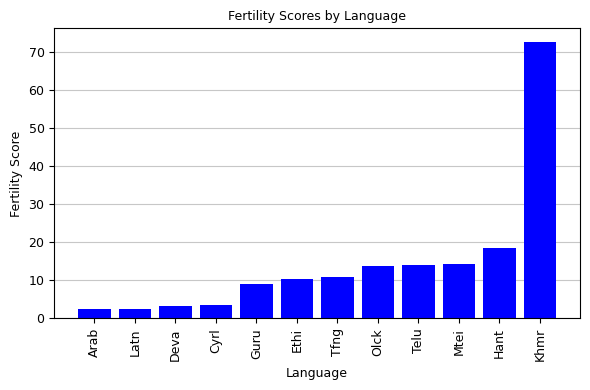

In [9]:
tokenmetrics.visualize_fertilities(figsize=(6, 4), color='blue')

In [10]:
tokenmetrics.parities

In [11]:
tokenmetrics.paritize(text_col1='text', text_col2='text2')

,text,text2,parity
0,"Sanskrit is a very complex and rich language, ...","Sanskrit is a very complex and rich language, ...",1.000000
1,"Докато планирате, имайте предвид, че макар Южн...",Keep in mind while planning that although Sout...,2.411765
2,Dessa krav är utformade för att skapa ett regl...,These requirements are designed to provide an ...,1.933333
3,I B&B della fascia più alta naturalmente si fa...,"At the top end, B&Bs obviously compete mainly ...",1.650000
4,ᱯᱨᱚᱠᱟᱥ ᱵᱟᱞᱵ ᱫᱚ ᱟᱨ ᱢᱤᱫ ᱡᱮᱠᱷᱟ ᱵᱚᱫᱚᱞ ᱫᱚᱨᱠᱟᱨ ᱠᱟᱱᱟ᱾...,The light bulb then needs replacing. It is nec...,11.684211
...,...,...,...
95,Diloja ni diloja mu ikoka dyazala ibhuka ya tu...,Every corner store is filled with a confusing ...,2.730769
96,Ang parehong golf ug rugby gikatakda nga mobal...,Both golf and rugby are set to return to the O...,1.461538
97,Ngalendlela ngeke udzinwe kakhulu. Khumbula ku...,"This way, you will tire yourself out as little...",1.742857
98,"Ishirahamwe Virgin ryaguze ""banki nziza"" ya No...",Virgin have only purchased the ‘good bank’ of ...,2.473684


In [12]:
tokenmetrics.parities

,text,text2,parity
0,"Sanskrit is a very complex and rich language, ...","Sanskrit is a very complex and rich language, ...",1.000000
1,"Докато планирате, имайте предвид, че макар Южн...",Keep in mind while planning that although Sout...,2.411765
2,Dessa krav är utformade för att skapa ett regl...,These requirements are designed to provide an ...,1.933333
3,I B&B della fascia più alta naturalmente si fa...,"At the top end, B&Bs obviously compete mainly ...",1.650000
4,ᱯᱨᱚᱠᱟᱥ ᱵᱟᱞᱵ ᱫᱚ ᱟᱨ ᱢᱤᱫ ᱡᱮᱠᱷᱟ ᱵᱚᱫᱚᱞ ᱫᱚᱨᱠᱟᱨ ᱠᱟᱱᱟ᱾...,The light bulb then needs replacing. It is nec...,11.684211
...,...,...,...
95,Diloja ni diloja mu ikoka dyazala ibhuka ya tu...,Every corner store is filled with a confusing ...,2.730769
96,Ang parehong golf ug rugby gikatakda nga mobal...,Both golf and rugby are set to return to the O...,1.461538
97,Ngalendlela ngeke udzinwe kakhulu. Khumbula ku...,"This way, you will tire yourself out as little...",1.742857
98,"Ishirahamwe Virgin ryaguze ""banki nziza"" ya No...",Virgin have only purchased the ‘good bank’ of ...,2.473684
